In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle
from tqdm import tqdm

# Configuration

In [2]:
class Configuration:

  recompute_dataframes=False

  class Paths:
    train_audio_folders = '/content/drive/MyDrive/Kaggle/Bird_CLEF2024/train_audio'
    train_audio_files='/content/drive/MyDrive/Kaggle/Bird_CLEF2024/train_audio/*/*.ogg'
    unlabeld_soundspaces='/content/drive/MyDrive/Kaggle/Bird_CLEF2024/unlabeled_soundscapes'
    taxonomy_birds = '/content/drive/MyDrive/Kaggle/Bird_CLEF2024/eBird_Taxonomy_v2021.csv'
    meta_data='/content/drive/MyDrive/Kaggle/Bird_CLEF2024/train_metadata.csv'
    sample_submission='/content/drive/MyDrive/Kaggle/Bird_CLEF2024/sample_submission.csv'


  class ClassInfo:
    class_names=sorted(os.listdir('/content/drive/MyDrive/Kaggle/Bird_CLEF2024/train_audio'))
    num_classes=len(class_names)
    labels=list(range(num_classes))
    labels_with_names = dict(zip(labels,class_names))

config=Configuration()

# Extracting audio signals and sample rates for audio processing

In [30]:
# Code for extracting the audio signal and sample rate of single example of each bird species
meta_data=pd.read_csv(config.Paths.meta_data)
meta_data['filepath'] = config.Paths.train_audio_folders+'/'+meta_data.filename
if config.recompute_dataframes:
  birds=meta_data['primary_label'].unique()
  df= meta_data.set_index('primary_label')
  bird_species=[]
  audio_signal=[]
  sample_rate=[]
  audio_data={}
  for bird in tqdm(birds, desc='Loading audio signal and sample rate'):

    path = df.loc[bird].iloc[0,:]['filepath']
    audio, sr = librosa.load(path)
    bird_species.append(bird)
    audio_signal.append(audio)
    sample_rate.append(sr)

  audio_data={'bird_species':bird_species,'audio_signal':audio_signal,'sample_rate':sample_rate}
  pd.DataFrame(audio_data).to_json('/content/drive/MyDrive/Kaggle/Bird_CLEF2024/audio_data.json')
else:
  audio_data = pd.read_json('/content/drive/MyDrive/Kaggle/Bird_CLEF2024/audio_data.json')


# Foundational details about audio files

In [31]:
audio_data.set_index('bird_species', inplace=True)
audio_data['duration_per_sample']=1/audio_data['sample_rate']
audio_data['total_duration']=audio_data['audio_signal'].apply(lambda x: len(x)*0.000045)
audio_data

audio_signal  sample_rate  \
bird_species                                                                   
asbfly        [1.1239e-06, -3.573e-07, -2.4089e-06, 4.2735e-...        22050   
ashdro1       [-5.3512000000000005e-06, -1.4844300000000001e...        22050   
ashpri1       [-3.243e-07, 1.5030000000000002e-07, 1.6685e-0...        22050   
ashwoo2       [-1.83616e-05, 6.191e-07, -9.752800000000001e-...        22050   
asikoe2       [8.736e-07, 1.3690000000000001e-06, 1.4408e-06...        22050   
...                                                         ...          ...   
woosan        [2.1520000000000003e-06, -2.0713e-06, 2.8441e-...        22050   
wynlau1       [-2.3569000000000003e-06, -7.584e-07, 1.5648e-...        22050   
yebbab1       [5.9283000000000005e-06, 1.6579100000000002e-0...        22050   
yebbul3       [-2.00361e-05, -7.918000000000001e-06, 2.41159...        22050   
zitcis1       [-7.551600000000001e-06, -2.08506e-05, 4.59640...        22050   

              duration_per_sample  total_duration  
bird_species                                       
asbfly                   0.000045       27.138285  
ashdro1                  0.000045       59.382765  
ashpri1                  0.000045       25.142445  
ashwoo2                  0.000045       49.870125  
asikoe2                  0.000045       22.213440  
...                           ...             ...  
woosan                   0.000045       25.842285  
wynlau1                  0.000045      102.461760  
yebbab1                  0.000045        9.979245  
yebbul3                  0.000045       39.631680  
zitcis1                  0.000045       10.621080  

[182 rows x 4 columns]

# Fourier Transform

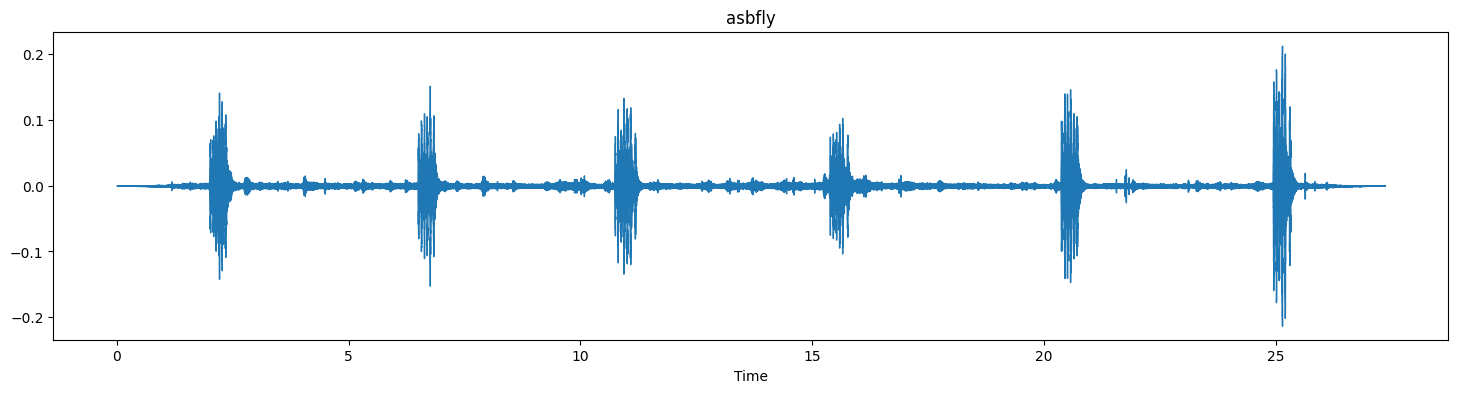

In [35]:
#plot the waveform
def play_sound_plot_wave(bird):
  signal=np.array(audio_data.loc[bird].audio_signal)
  sr=audio_data.loc[bird].sample_rate
  # play the sound
  display(ipd.Audio(signal, rate=sr))

  # plot the wave
  plt.figure(figsize=(18,4))
  librosa.display.waveshow(signal, sr=sr)
  plt.title(bird)
  plt.show()

play_sound_plot_wave('asbfly')

Fourier Transform gives a frequency againt each sample in the audio signal. Not all the frequency are notable. We select the frequencies with significant magnitudes

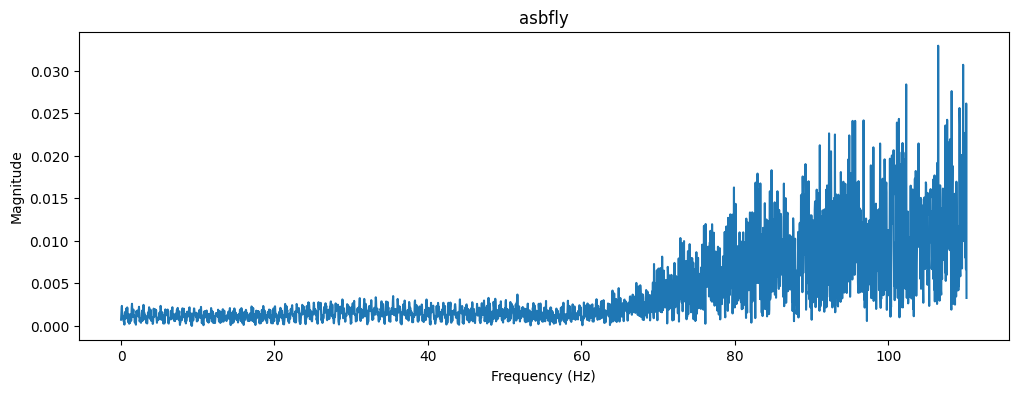

In [63]:
def fft_spectrum(bird, f_ratio=1):
  """ bird: common name in audio_data dataframe
      f_ratio: By changing f_ratio we can zoom into dominant frequencies"""
  signal=np.array(audio_data.loc[bird].audio_signal)
  sr=audio_data.loc[bird].sample_rate
  fft = np.fft.fft(signal)
  magnitude_spectrum= np.abs(fft)
  # plot magnitude spectrum

  frequency = np.linspace(0,sr, len(magnitude_spectrum))
  num_frequency_peaks = int(len(frequency)*f_ratio)
  plt.figure(figsize=(12,4))
  plt.plot(frequency[:num_frequency_peaks],
           magnitude_spectrum[:num_frequency_peaks])

  plt.ylabel('Magnitude')
  plt.xlabel('Frequency (Hz)')
  plt.title(bird)

  plt.show()

fft_spectrum('asbfly', 1/200)


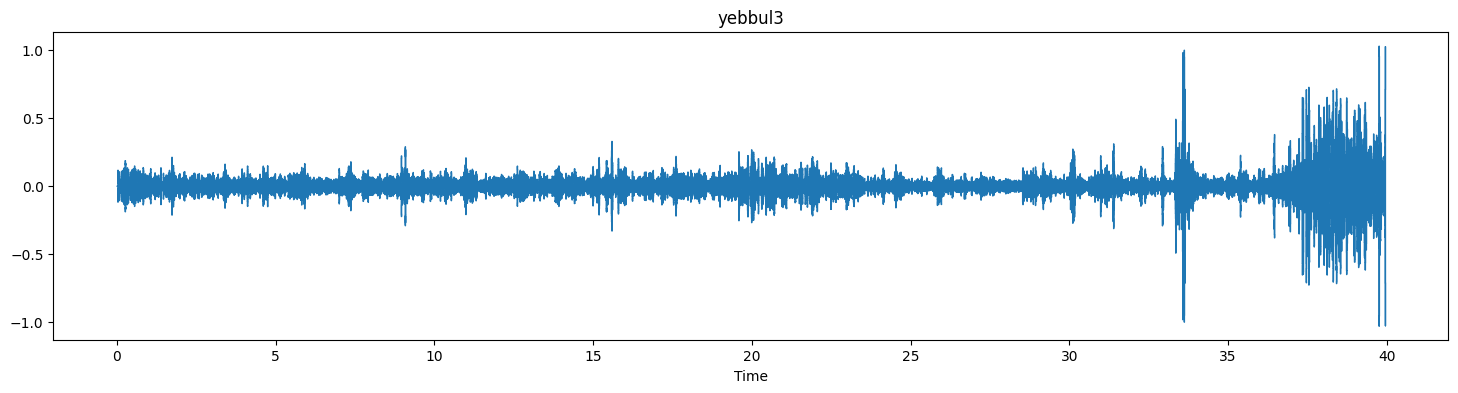

In [39]:
play_sound_plot_wave('yebbul3')

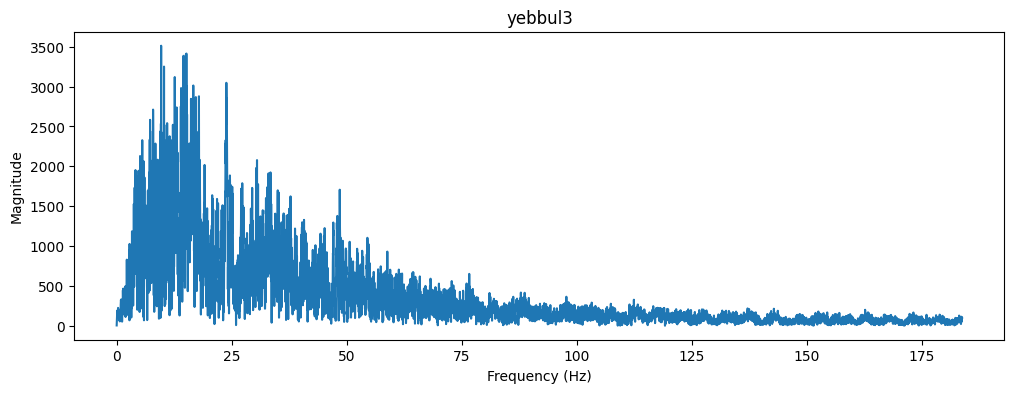

In [65]:
fft_spectrum('yebbul3',1/120)

In [ ]:
fft_spectrum()